# This notebook was created to identify the cluster of sub-lineage 2.2.1.1.1.i3 isolates (444/1893) from a t-SNE (based on pairwise SNP distance) of all isolates and to visualize homoplastic variants in the *eis* promoter and *eis* within the isolate cluster.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
from matplotlib import gridspec
import itertools

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

### Load SNP genotype matrix and Annotation Files

In [3]:
#load isolate annotation file (columns of Genotype Matrix)
isolate_annotation_DF_SNPs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

#load SNP annotation file (rows of Genotype Matrix) with gene annotation information
SNP_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_SNP_annotation.pkl')

#load SNP functional annotation file
SNP_func_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_SNP_functional_annotation.pkl')

#load Genotypes Matrix
genotypes_array_SNPs =  np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_matrix.npy')

In [4]:
allele_code_map_dict = {'A':0 , 'C':1 , 'G':2 , 'T':3}
allele_code_map_dict_r = {0:'A' , 1:'C' , 2:'G' , 3:'T'}

In [5]:
isolate_annotation_DF_SNPs.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [6]:
np.shape(isolate_annotation_DF_SNPs)

(31428, 14)

In [7]:
SNP_annotation_DF.head()

,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
0,48,C,[T],Rv0001,47.0,Essential,dnaA
1,64,G,[C],Rv0001,63.0,Essential,dnaA
2,67,G,"[A, T]",Rv0001,66.0,Essential,dnaA
3,69,C,[T],Rv0001,68.0,Essential,dnaA
4,71,C,[T],Rv0001,70.0,Essential,dnaA


In [8]:
np.shape(SNP_annotation_DF)

(782565, 7)

In [9]:
np.shape(genotypes_array_SNPs)

(782565, 31428)

### Load INDEL genotype matrix and Annotation Files

In [10]:
#load isolate annotation file (columns of Genotype Matrix)
isolate_annotation_DF_indels = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

#load INDEL annotation file (rows of Genotype Matrix) with gene annotation information
INDEL_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_INDEL_annotation.pkl')

#load Genotypes Matrix
genotypes_array_INDELs =  np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape_indels/Genotypes_Filtered_2/genotypes_matrix.npy')

In [11]:
isolate_annotation_DF_indels.head()

,isolate_ID,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,lineage_call,group
0,SAMN13051687,2,2,1,1,1,i3,NaN,NaN,NaN,NaN,NaN,2.2.1.1.1.i3,2
1,SAMN09100245,4,2,1,2,1,1,i3,2,NaN,NaN,NaN,4.2.1.2.1.1.i3.2,4B
2,SAMN08732238,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2.2.1.1.1,2
3,SAMN07658260,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1.1,3
4,SAMN03648003,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2.2.1.1.1,2


In [12]:
np.shape(isolate_annotation_DF_indels)

(31428, 14)

In [13]:
INDEL_annotation_DF.head()

,key,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
0,ACCGACGAAG_313_A,313,ACCGACGAAG,A,Rv0001,312.0,Essential,dnaA
1,TC_1549_T,1549,TC,T,intergenic,NaN,None,None
2,T_1552_TAA,1552,T,TAA,intergenic,NaN,None,None
3,TAA_1552_T,1552,TAA,T,intergenic,NaN,None,None
4,T_1552_TA,1552,T,TA,intergenic,NaN,None,None


In [14]:
np.shape(INDEL_annotation_DF)

(50260, 8)

In [15]:
np.shape(genotypes_array_INDELs)

(50260, 31428)

### Switch Genoyptes Matrix *columns* & Isolate Annotation *rows* to match isolate ordering for SNP genotypes matrix (used to construct t-SNE embeddings)

In [16]:
#this will be the order of the isolates in the t-SNE embeddings
isolate_reorder = [isolate_annotation_DF_indels[isolate_annotation_DF_indels.isolate_ID == isolate_ID].index[0] for isolate_ID in isolate_annotation_DF_SNPs.isolate_ID]

#re-order rows of isolate annotation df
isolate_annotation_DF_indels = isolate_annotation_DF_indels.iloc[isolate_reorder , :]
isolate_annotation_DF_indels.reset_index(inplace = True , drop = True)

#re-order columns for genotypes matrix
genotypes_array_INDELs = genotypes_array_INDELs[: , isolate_reorder]

In [17]:
isolate_annotation_DF_indels.head()

,isolate_ID,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,lineage_call,group
0,SAMEA3558733,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,4.2.1.2.1.1.i3.1,4B
1,SAMN03648641,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,4.2.1.2.2.1.1,4B
2,SAMN03647419,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1.1.i1,3
3,SAMEA3671418,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,4.2.1.2.1.1.i1,4B
4,SAMN07659096,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1.1.2,1


### t-SNE

Import t-SNE embeddings

In [18]:
t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt')

In [19]:
t_SNE_coords

array([[ 15.77039433, -31.88985825],
       [ 47.15923691, -36.95353317],
       [ 12.14623451,  71.26150513],
       ...,
       [-15.47960186,  38.40433884],
       [ 16.71702766, -43.72228622],
       [ 68.94006348,  35.38974762]])

In [20]:
np.shape(t_SNE_coords)

(31428, 2)

### Define function to plot den-SNE & label isolates with a mutant allele

In [21]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 9})
plt.rc('font', family='serif')

In [22]:
def t_SNE_label_isolates_with_SNP(pos_i , mut_allele , SNP_label , fig , ax):
    
    #Get Genotypes for SNP
    #get row index of genotypes matrix that corresponds to this row
    SNP_site_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == pos_i].index.values[0]

    #get the genotypes for all isolates
    SNP_site_genotypes = genotypes_array_SNPs[SNP_site_row_index , :]

    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool = SNP_site_genotypes == allele_code_map_dict[mut_allele]

    #construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
    isolate_mutant_allele_no_match_bool = SNP_site_genotypes != allele_code_map_dict[mut_allele]
    
    #Plot coordinates for each isolate
    
    #isolates without mutant allele
    other_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.15 , alpha = 0.40 , s = 15)

    #isolates with mutant allele
    mut_allele_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.15 , alpha = 1.0 , s = 15)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=12, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=12, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((mut_allele_isolates, other_isolates), (SNP_label + ' (N = ' + str(sum(isolate_mutant_allele_match_bool)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1,fontsize=8 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.01)
    
    #plot parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

In [23]:
def t_SNE_label_isolates_with_INDEL(mut_key , indel_label , fig , ax):
    
    #Get Genotypes for INDEL
    #get row index of genotypes matrix that corresponds to this row
    INDEL_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == mut_key].index.values[0]

    #get the genotypes for all isolates
    INDEL_genotypes = genotypes_array_INDELs[INDEL_row_index , :]

    #construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
    isolate_mutant_allele_match_bool = INDEL_genotypes == 1

    #construct a boolean array that is FALSE if isolate's genotype matches the mutant allele and TRUE otherwise
    isolate_mutant_allele_no_match_bool = INDEL_genotypes == 0
    
    #Plot coordinates for each isolate
    
    #isolates without mutant allele
    other_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_no_match_bool] , t_SNE_coords[: , 1][isolate_mutant_allele_no_match_bool]  , color = 'xkcd:golden yellow' , edgecolor = 'white' , linewidth = 0.15 , alpha = 0.40 , s = 15)

    #isolates with mutant allele
    mut_allele_isolates = ax.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:black' , edgecolor = 'white' , linewidth = 0.15 , alpha = 1.0 , s = 15)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

    #add legend
    ax.legend((mut_allele_isolates, other_isolates), (indel_label + ' (n = ' + str(sum(isolate_mutant_allele_match_bool)) + ')', 'isolates without mutant allele'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1, loc='lower left' , ncol=1,fontsize=8 , mode="expand", borderaxespad=0, frameon=False, handletextpad=0.01)

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
    ax.tick_params(axis='x', pad=0.0)

    ax.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
    ax.tick_params(axis='y', pad=0.0)

Get **promoter SNP** of interest

In [24]:
SNPs_interest = [2715346]
SNP_annotation_DF.loc[[SNP_pos in SNPs_interest for SNP_pos in SNP_annotation_DF.pos]]

,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
490018,2715346,G,[A],intergenic,NaN,None,None


Get **gene body SNP** of interest

In [25]:
SNPs_interest = [2715330]
SNP_annotation_DF.loc[[SNP_pos in SNPs_interest for SNP_pos in SNP_annotation_DF.pos]]

,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
490009,2715330,C,[T],Rv2416c,1206.0,Non-Essential,eis


Get **gene body indel** of interest

In [26]:
INDEL_keys_interest = ['GA_2714885_G']
INDEL_annotation_DF.loc[[indel_key in INDEL_keys_interest for indel_key in INDEL_annotation_DF.key]]

,key,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name
31204,GA_2714885_G,2714885,GA,G,Rv2416c,761.0,Non-Essential,eis


#### Specific mutations that we're are interested in

In [26]:
2715346, 'A' '-14A eis-Rv2417c'

2715330, 'T', 'eis 3C>T V1V'

'GA_2714885_G', 'eis 448delA'

'A_2714860_AT', 'eis 473insT'

(2715346, 'A-14A eis-Rv2417c')

### Main Figure 7

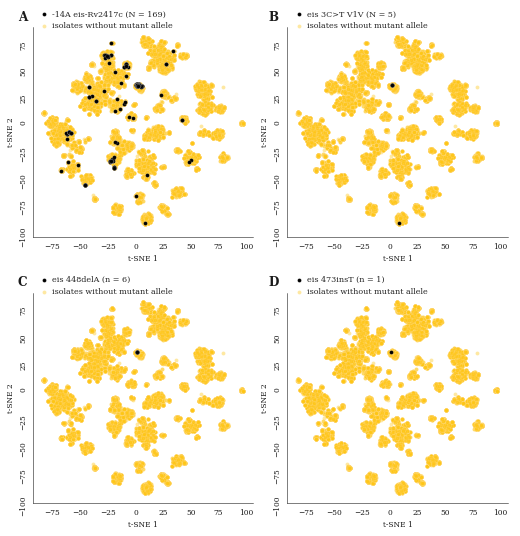

In [56]:
figM7 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=figM7 , wspace=0.155, hspace=0.265)
figM7_ax1 = figM7.add_subplot(spec2[0, 0])
figM7_ax2 = figM7.add_subplot(spec2[0, 1])
figM7_ax3 = figM7.add_subplot(spec2[1, 0])
figM7_ax4 = figM7.add_subplot(spec2[1, 1])

################################################################################################################

t_SNE_label_isolates_with_SNP(2715346 , 'A' , '-14A eis-Rv2417c' , figM7 , figM7_ax1)

t_SNE_label_isolates_with_SNP(2715330 , 'T' , 'eis 3C>T V1V' , figM7 , figM7_ax2)

t_SNE_label_isolates_with_INDEL('GA_2714885_G' , 'eis 448delA' , figM7 , figM7_ax3)

t_SNE_label_isolates_with_INDEL('A_2714860_AT' , 'eis 473insT' , figM7 , figM7_ax4)

################################################################################################################

figM7.text(0.10, 0.89, 'A', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.89, 'B', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.10, 0.47, 'C', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.47, 'D', fontsize=12 , fontweight='bold' , color = 'k')

figM7 = plt.gcf()
figM7.set_size_inches(8.5, 8.75)
figM7.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/mmpR_BDQ_mutant_project/figures/eis promoter SNP eis mutations tSNE.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()

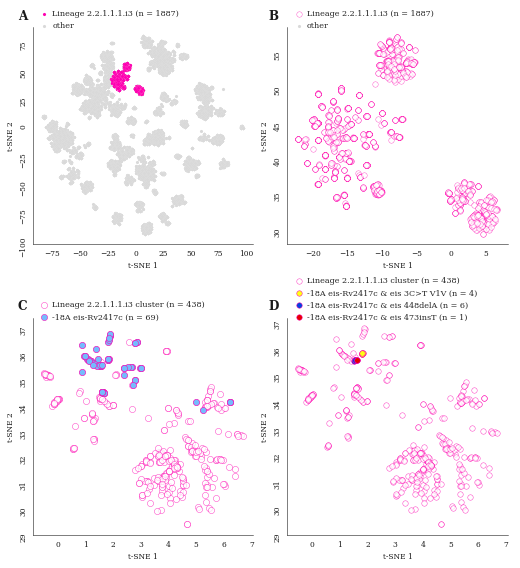

In [57]:
figM7 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=figM7 , wspace=0.155, hspace=0.34)
figM7_ax1 = figM7.add_subplot(spec2[0, 0])
figM7_ax2 = figM7.add_subplot(spec2[0, 1])
figM7_ax3 = figM7.add_subplot(spec2[1, 0])
figM7_ax4 = figM7.add_subplot(spec2[1, 1])

#A: sublineage 2.2.1.1.1.i3 highlighted in context of all isolates
################################################################################################################
circ_size = 10
alpha = 1.0
linewidth = 0.05

#Plot coordinates for each isolate
all_isolates = figM7_ax1.scatter( t_SNE_coords[: , 0] , t_SNE_coords[: , 1] ,  color = '0.85' , edgecolor = 'white' , linewidth = linewidth , alpha = alpha , s = circ_size)

#lineage 2.2.1.1.1.i3
isolate_sublineage_filter = [isolate_i_lineage_call[0:13] == '2.2.1.1.1.i3' for isolate_i_lineage_call in isolate_annotation_DF_indels.lineage_call]

#plot points for all isolates that belong to this sub-lineage
L_22111i3 = figM7_ax1.scatter( t_SNE_coords[: , 0][isolate_sublineage_filter] , t_SNE_coords[: , 1][isolate_sublineage_filter]  , color = 'xkcd:bright pink' , edgecolor = 'xkcd:white' , linewidth = linewidth , alpha = alpha , s = circ_size)

figM7_ax1.spines['right'].set_visible(False)
figM7_ax1.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figM7_ax1.spines[axis].set_linewidth(0.5)

figM7_ax1.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
figM7_ax1.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

#add legend
figM7_ax1.legend((L_22111i3, all_isolates), ('Lineage 2.2.1.1.1.i3' + ' (n = ' + str(sum(isolate_sublineage_filter)) + ')', 'other'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=1, fontsize=8 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)

#add axis labels
figM7_ax1.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
figM7_ax1.tick_params(axis='x', pad=0.0)

figM7_ax1.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
figM7_ax1.tick_params(axis='y', pad=0.0)
################################################################################################################

#B: only isolates belonging to sublineage 2.2.1.1.1.i3
################################################################################################################

#lineage 2.2.1.1.1.i3
isolate_sublineage_filter = [isolate_i_lineage_call[0:12] == '2.2.1.1.1.i3' for isolate_i_lineage_call in isolate_annotation_DF_indels.lineage_call]

#plot points for all isolates that belong to this sub-lineage
L_22111i3 = figM7_ax2.scatter( t_SNE_coords[: , 0][isolate_sublineage_filter] , t_SNE_coords[: , 1][isolate_sublineage_filter]  , color = 'xkcd:white' , edgecolor = 'xkcd:bright pink' , linewidth = 0.4 , alpha = 0.75 , s = 30)

figM7_ax2.spines['right'].set_visible(False)
figM7_ax2.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figM7_ax2.spines[axis].set_linewidth(0.5)

figM7_ax2.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
figM7_ax2.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

#add legend
figM7_ax2.legend((L_22111i3, all_isolates), ('Lineage 2.2.1.1.1.i3' + ' (n = ' + str(sum(isolate_sublineage_filter)) + ')', 'other'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=1, fontsize=8 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)

#add axis labels
figM7_ax2.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
figM7_ax2.tick_params(axis='x', pad=0.0)

figM7_ax2.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
figM7_ax2.tick_params(axis='y', pad=0.0)
################################################################################################################

#C: only isolates belonging to sublineage 2.2.1.1.1.i3 cluster
################################################################################################################

#lineage 2.2.1.1.1.i3 (SUBSET this sublineage to cluster of isolates with -2 <= t-SNE_1 <= 8 , 26 <= t-SNE_2 <= 38)
isolate_sublineage_filter = [isolate_i_lineage_call[0:12] == '2.2.1.1.1.i3' for isolate_i_lineage_call in isolate_annotation_DF_indels.lineage_call] # n = 1887
isolate_cluster_filter = [( -2 <= tSNE_1 <= 8 ) and ( 26 <= tSNE_2 <= 38 ) for tSNE_1, tSNE_2 in zip(t_SNE_coords[: , 0], t_SNE_coords[: , 1])] #n = 439

#create filter based off of isolates belonging to cluster within sublineage
isolate_sublineage_cluster_filter = [(isolate_in_sublineage and isolate_in_cluster) for isolate_in_sublineage, isolate_in_cluster in zip(isolate_sublineage_filter, isolate_cluster_filter)] #n = 438

#plot points for all isolates that belong to this sub-lineage & cluster with double mutants
L_22111i3_cluster = figM7_ax3.scatter( t_SNE_coords[: , 0][isolate_sublineage_cluster_filter] , t_SNE_coords[: , 1][isolate_sublineage_cluster_filter]  , color = 'xkcd:white' , edgecolor = 'xkcd:bright pink' , linewidth = 0.5 , alpha = 0.75 , s = 38)

#plot isolates with promoter SNP

#isolates have eis promoter SNP + eis indel
eis_promoter_SNP_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == 2715346].index.values[0]

#get the genotypes for all isolates
eis_promoter_SNP_genotypes = genotypes_array_SNPs[eis_promoter_SNP_row_index , :]

#construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
isolate_mutant_allele_match_bool = [(isolate_with_eis_promoter_SNP and isolate_belong_to_sublineage_cluster) for isolate_with_eis_promoter_SNP, isolate_belong_to_sublineage_cluster in zip(eis_promoter_SNP_genotypes == allele_code_map_dict['A'], isolate_sublineage_cluster_filter)]

#Plot coordinates for each isolate with both mutant allele
mut_allele_isolates = figM7_ax3.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool]  ,  color = 'xkcd:sky blue' , edgecolor = 'xkcd:bright pink' , linewidth = 0.5 , alpha = 1.0 , s = 38)

figM7_ax3.spines['right'].set_visible(False)
figM7_ax3.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figM7_ax3.spines[axis].set_linewidth(0.5)

figM7_ax3.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
figM7_ax3.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

#add legend
figM7_ax3.legend((L_22111i3_cluster, mut_allele_isolates), ('Lineage 2.2.1.1.1.i3 cluster' + ' (n = ' + str(sum(isolate_sublineage_cluster_filter)) + ')', '-18A eis-Rv2417c' + ' (n = ' + str(sum(isolate_mutant_allele_match_bool)) + ')'), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=1, fontsize=8 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)

#add axis labels
figM7_ax3.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
figM7_ax3.tick_params(axis='x', pad=0.0)

figM7_ax3.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
figM7_ax3.tick_params(axis='y', pad=0.0)
################################################################################################################


#D: only isolates belonging to sublineage 2.2.1.1.1.i3 cluster
################################################################################################################

#lineage 2.2.1.1.1.i3 (SUBSET this sublineage to cluster of isolates with -2 <= t-SNE_1 <= 8 , 26 <= t-SNE_2 <= 38)
isolate_sublineage_filter = [isolate_i_lineage_call[0:12] == '2.2.1.1.1.i3' for isolate_i_lineage_call in isolate_annotation_DF_indels.lineage_call] # n = 1887
isolate_cluster_filter = [( -2 <= tSNE_1 <= 8 ) and ( 26 <= tSNE_2 <= 38 ) for tSNE_1, tSNE_2 in zip(t_SNE_coords[: , 0], t_SNE_coords[: , 1])] #n = 439

#create filter based off of isolates belonging to cluster within sublineage
isolate_sublineage_cluster_filter = [(isolate_in_sublineage and isolate_in_cluster) for isolate_in_sublineage, isolate_in_cluster in zip(isolate_sublineage_filter, isolate_cluster_filter)] #n = 438

#plot points for all isolates that belong to this sub-lineage & cluster with double mutants
L_22111i3_cluster = figM7_ax4.scatter( t_SNE_coords[: , 0][isolate_sublineage_cluster_filter] , t_SNE_coords[: , 1][isolate_sublineage_cluster_filter]  , color = 'xkcd:white' , edgecolor = 'xkcd:bright pink' , linewidth = 0.5 , alpha = 0.75 , s = 30)

#get the isolates with the promoter SNP
eis_promoter_SNP_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == 2715346].index.values[0]
eis_promoter_SNP_genotypes = genotypes_array_SNPs[eis_promoter_SNP_row_index , :]


####### plot isolates with promoter SNP & (eis 3C>T V1V) #######
#isolates that belong to 2.2.1.1.1.i3 & have eis promoter SNP + eis SNP
eis_gene_SNP_row_index = SNP_annotation_DF[SNP_annotation_DF.pos == 2715330].index.values[0]
eis_gene_SNP_genotypes = genotypes_array_SNPs[eis_gene_SNP_row_index, :] #get the genotypes for all isolates

#construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
isolate_mutant_allele_match_bool_eis_SNP = [(isolate_with_eis_promoter_SNP and isolate_with_eis_SNP and isolate_belong_to_sublineage_cluster) for isolate_with_eis_promoter_SNP, isolate_with_eis_SNP, isolate_belong_to_sublineage_cluster in zip(eis_promoter_SNP_genotypes == allele_code_map_dict['A'], eis_gene_SNP_genotypes == allele_code_map_dict['T'], isolate_sublineage_cluster_filter)]
#Plot coordinates for each isolate with both mutant allele
mut_allele_isolates_eis_SNP = figM7_ax4.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool_eis_SNP], t_SNE_coords[: , 1][isolate_mutant_allele_match_bool_eis_SNP]  ,  color = 'xkcd:yellow' , edgecolor = 'xkcd:bright pink' , linewidth = 0.5 , alpha = 1.0 , s = 30)


####### plot isolates with promoter SNP & (eis 448delA) #######
eis_del_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == 'GA_2714885_G'].index.values[0]
eis_del_genotypes = genotypes_array_INDELs[eis_del_row_index, :] #get the genotypes for all isolates

#construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
isolate_mutant_allele_match_bool_eis_del = [(isolate_with_eis_promoter_SNP and isolate_with_eis_del and isolate_belong_to_sublineage_cluster) for isolate_with_eis_promoter_SNP, isolate_with_eis_del, isolate_belong_to_sublineage_cluster in zip(eis_promoter_SNP_genotypes == allele_code_map_dict['A'], eis_del_genotypes == 1, isolate_sublineage_cluster_filter)]
#Plot coordinates for each isolate with both mutant allele
mut_allele_isolates_eis_del = figM7_ax4.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool_eis_del] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool_eis_del]  ,  color = 'xkcd:blue' , edgecolor = 'xkcd:bright pink' , linewidth = 0.5 , alpha = 1.0 , s = 30)


####### plot isolates with promoter SNP & (eis 473insT) #######
eis_ins_row_index = INDEL_annotation_DF[INDEL_annotation_DF.key == 'A_2714860_AT'].index.values[0]
eis_ins_genotypes = genotypes_array_INDELs[eis_ins_row_index, :] #get the genotypes for all isolates

#construct a boolean array that is TRUE if isolate's genotype matches the mutant allele and FALSE otherwise
isolate_mutant_allele_match_bool_eis_ins = [(isolate_with_eis_promoter_SNP and isolate_with_eis_ins and isolate_belong_to_sublineage_cluster) for isolate_with_eis_promoter_SNP, isolate_with_eis_ins, isolate_belong_to_sublineage_cluster in zip(eis_promoter_SNP_genotypes == allele_code_map_dict['A'], eis_ins_genotypes == 1, isolate_sublineage_cluster_filter)]
#Plot coordinates for each isolate with both mutant allele
mut_allele_isolates_eis_ins = figM7_ax4.scatter( t_SNE_coords[: , 0][isolate_mutant_allele_match_bool_eis_ins] ,t_SNE_coords[: , 1][isolate_mutant_allele_match_bool_eis_ins]  ,  color = 'xkcd:red' , edgecolor = 'xkcd:bright pink' , linewidth = 0.5 , alpha = 1.0 , s = 30)


figM7_ax4.spines['right'].set_visible(False)
figM7_ax4.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    figM7_ax4.spines[axis].set_linewidth(0.5)

figM7_ax4.tick_params(axis='y', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k', rotation = 90)
figM7_ax4.tick_params(axis='x', which='major', labelsize=7.5, pad = 0.0, labelcolor = 'k')

eis_SNP_label = '-18A eis-Rv2417c & eis 3C>T V1V' + ' (n = ' + str(sum(isolate_mutant_allele_match_bool_eis_SNP)) + ')'
eis_del_label = '-18A eis-Rv2417c & eis 448delA' + ' (n = ' + str(sum(isolate_mutant_allele_match_bool_eis_del)) + ')'
eis_ins_label = '-18A eis-Rv2417c & eis 473insT' + ' (n = ' + str(sum(isolate_mutant_allele_match_bool_eis_ins)) + ')'

#add legend
figM7_ax4.legend((L_22111i3_cluster, mut_allele_isolates_eis_SNP, mut_allele_isolates_eis_del, mut_allele_isolates_eis_ins), ('Lineage 2.2.1.1.1.i3 cluster' + ' (n = ' + str(sum(isolate_sublineage_cluster_filter)) + ')', eis_SNP_label, eis_del_label, eis_ins_label), bbox_to_anchor=(0,0.97,1,0.2) , scatterpoints=1 , loc='lower left', ncol=1, fontsize=8 ,mode="expand", borderaxespad=0 , frameon=False , handletextpad=0.01)

#add axis labels
figM7_ax4.set_xlabel('t-SNE 1' , fontsize = '7.5' , color = 'k')
figM7_ax4.tick_params(axis='x', pad=0.0)

figM7_ax4.set_ylabel('t-SNE 2', fontsize = '7.5', color = 'k')
figM7_ax4.tick_params(axis='y', pad=0.0)
################################################################################################################

figM7.text(0.10, 0.89, 'A', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.89, 'B', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.10, 0.46, 'C', fontsize=12 , fontweight='bold' , color = 'k')
figM7.text(0.51, 0.46, 'D', fontsize=12 , fontweight='bold' , color = 'k')

figM7 = plt.gcf()
figM7.set_size_inches(8.5, 9.35)
figM7.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/mmpR_BDQ_mutant_project/figures/eis promoter SNP eis mutations 22111i3 tSNE.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()